Dense Neural Network (Fp1 + Fp2)

In [ ]:
# CODES FOR MODELS ANALYSIS AND CHOOSING CODE FOR EEG FEATURES TRAINING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load features
df = pd.read_csv(r"D:\SEMESTER PROJECT\Datasets\Alzheimer's disease, Frontotemporal dementia and Healthy subjects\ds004504\derivatives\features.csv")

# Example: If you have a separate label CSV or can infer from subject ID
# Let's assume subjects starting with:
# sub-001 to sub-030: Healthy -> label 0
# sub-031 to sub-060: Alzheimer's -> label 1
# sub-061 to sub-088: Frontotemporal Dementia -> label 2

def assign_label(sub):
    n = int(sub.split("-")[1])
    if n <= 30:
        return 0
    elif n <= 60:
        return 1
    else:
        return 2

df['Label'] = df['Subject'].apply(assign_label)

# Select only Fp1 and Fp2 channels
channels = ['Fp1', 'Fp2']
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

X = df[[f"{ch}_{band}" for ch in channels for band in bands]].values
y = df['Label'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyboardInterrupt: 

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Healthy, Alzheimer's, FTD
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


d:\SOFTWARES\MiniConda\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\SOFTWARES\MiniConda\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\SOFTWARES\MiniConda\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the nex

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931 (3.64 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=10
)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7000 - loss: 0.6968 - val_accuracy: 0.6111 - val_loss: 0.8125
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 0.7446 - val_accuracy: 0.6111 - val_loss: 0.8214
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6571 - loss: 0.7628 - val_accuracy: 0.6111 - val_loss: 0.8258
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7286 - loss: 0.7040 - val_accuracy: 0.6111 - val_loss: 0.8319
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7286 - loss: 0.6655 - val_accuracy: 0.6111 - val_loss: 0.8356
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6714 - loss: 0.7222 - val_accuracy: 0.6111 - val_loss: 0.8343
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6571 - loss: 0.7958 - val_accuracy: 0.5556 - val_loss: 0.8332
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6429 - loss: 0.7673 - val_accuracy: 0.6111 - val_loss: 0.8237


In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6111 - loss: 0.8001
Test Accuracy: 61.11%


XGBoost with Fp1 and Fp2 channels

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load features.csv
df = pd.read_csv(r"D:\SEMESTER PROJECT\Datasets\Alzheimer's disease, Frontotemporal dementia and Healthy subjects\ds004504\derivatives\features.csv")

# Assign labels based on subject IDs
def assign_label(sub):
    n = int(sub.split("-")[1])
    if n <= 30:
        return 0   # Healthy
    elif n <= 60:
        return 1   # Alzheimer's
    else:
        return 2   # Frontotemporal Dementia

df['Label'] = df['Subject'].apply(assign_label)

# Channels and bands
channels = ['Fp1', 'Fp2']
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Select features
X = df[[f"{ch}_{band}" for ch in channels for band in bands]].values
y = df['Label'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for XGBoost too)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


d:\SOFTWARES\MiniConda\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 44.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.50      0.50      0.50         6
           2       0.29      0.33      0.31         6

    accuracy                           0.44        18
   macro avg       0.46      0.44      0.45        18
weighted avg       0.46      0.44      0.45        18


Confusion Matrix:
 [[3 1 2]
 [0 3 3]
 [2 2 2]]


In [10]:
import joblib

# Save trained model
joblib.dump(xgb_model, "dual_channel_fp1_fp2_xgb_model.pkl")
# Save scaler too
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Dense Neural Network (using more Electrodes)

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load features
features_df = pd.read_csv("features.csv", index_col=0)  # assuming first col is subject_id

# Load labels
participants = pd.read_csv("participants.tsv", sep='\t')
# Example: classify by Group: 'A', 'C', 'F'
participants = participants[['participant_id', 'Group']]

# Merge
df = features_df.copy()
df['participant_id'] = df.index.str.replace("_task-eyesclosed_eeg", "")
df = df.merge(participants, on='participant_id', how='left')

# Encode target
le = LabelEncoder()
df['label'] = le.fit_transform(df['Group'])  # 0,1,2 etc.


In [21]:
# Drop non-feature columns
feature_cols = [c for c in df.columns if c not in ['participant_id', 'Group', 'label']]
X = df[feature_cols].values.astype(np.float32)  # IMPORTANT: float32
y = df['label'].values.astype(np.int32)         # IMPORTANT: int32


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # multi-class
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(0.001), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=100, batch_size=8, 
                    validation_split=0.2)


Epoch 1/100


d:\SOFTWARES\MiniConda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.3929 - loss: 1.0990 - val_accuracy: 0.5000 - val_loss: 1.0949
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3929 - loss: 1.0974 - val_accuracy: 0.5000 - val_loss: 1.0931
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3929 - loss: 1.0963 - val_accuracy: 0.5000 - val_loss: 1.0901
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3929 - loss: 1.0942 - val_accuracy: 0.5000 - val_loss: 1.0867
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3929 - loss: 1.0927 - val_accuracy: 0.5000 - val_loss: 1.0836
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3929 - loss: 1.0933 - val_accuracy: 0.5000 - val_loss: 1.0805
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3929 - loss: 1.0892 - val_accuracy: 0.5000 - val_loss: 1.0762
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3929 - loss: 1.0886 - val_accuracy: 0.5000 - val_loss: 1.0728
Epoc

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# --- Evaluate on test data ---
loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# --- Predictions ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Detailed metrics ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 38.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.39      1.00      0.56         7
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5

    accuracy                           0.39        18
   macro avg       0.13      0.33      0.19        18
weighted avg       0.15      0.39      0.22        18

Confusion Matrix:
[[7 0 0]
 [6 0 0]
 [5 0 0]]


d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


DNN with Frontal + Central electrodes, Theta + Alpha bands

d:\SOFTWARES\MiniConda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.3393 - loss: 1.3263 - val_accuracy: 0.2857 - val_loss: 1.1358
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3571 - loss: 1.1941 - val_accuracy: 0.3571 - val_loss: 1.1175
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2857 - loss: 1.2111 - val_accuracy: 0.2857 - val_loss: 1.1003
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3929 - loss: 1.1012 - val_accuracy: 0.3571 - val_loss: 1.0865
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4821 - loss: 1.0320 - val_accuracy: 0.3571 - val_loss: 1.0755
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4643 - loss: 1.0354 - val_accuracy: 0.3571 - val_loss: 1.0689
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5714 - loss: 1.0251 - val_accuracy: 0.4286 - val_loss: 1.0636
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5000 - loss: 1.0115 - val_accuracy: 0.4286 - val_loss: 1.

d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


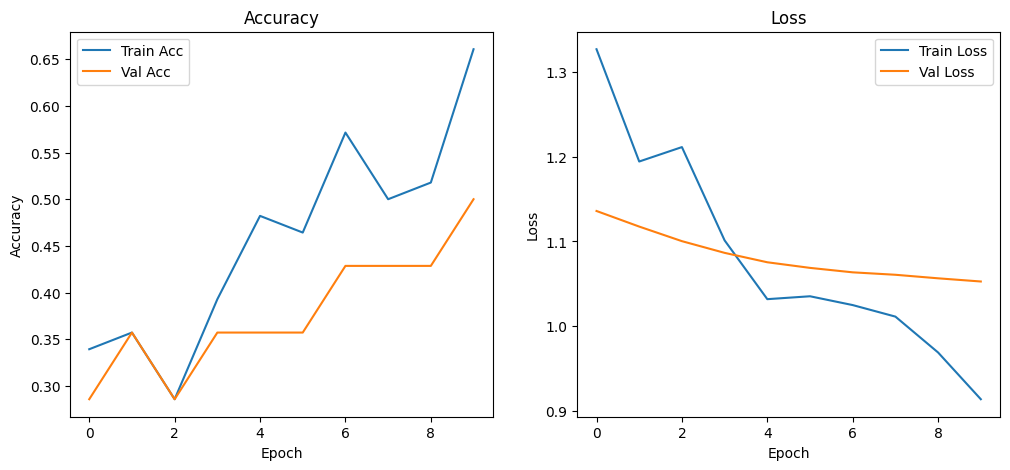

In [26]:
# ------------------------------
# EEG MCI Classification
# ------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# ------------------------------
# 1️⃣ Load Features and Labels
# ------------------------------

# EEG features CSV
features_file = r"features.csv"
df_features = pd.read_csv(features_file)

# Labels TSV
labels_file = r"participants.tsv"
df_labels = pd.read_csv(labels_file, sep='\t')

# Merge features with labels based on participant_id
df_features['participant_id'] = df_features.index + 1  # or adjust if your CSV has ids
df = df_features.copy()

# Select only relevant electrodes and bands
electrodes = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz']
bands = ['theta', 'alpha']

feature_cols = [f"{elec}_{band}" for elec in electrodes for band in bands]

# Assuming your CSV has columns like: 'Fp1_theta', 'Fp1_alpha', etc.
X = df[feature_cols].values

# Labels (convert 'Group' column to numeric: A=0, C=1, F=2 etc.)
# Adjust based on your dataset classes (MCI/AD/Healthy)
y_raw = df_labels['Group'].values
le = LabelEncoder()
y = le.fit_transform(y_raw)
y = to_categorical(y)  # for multi-class classification

# ------------------------------
# 2️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------
# 3️⃣ Build Dense Neural Network
# ------------------------------
input_dim = X_train.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')  # multi-class
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy']
)

# ------------------------------
# 4️⃣ Train
# ------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,  # Reduced epochs to prevent overfitting
    batch_size=32,  # Increased batch size for faster training
    validation_split=0.2,
    verbose=1
)

# ------------------------------
# 5️⃣ Evaluate
# ------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report & confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# ------------------------------
# 6️⃣ Optional: Plot training curves
# ------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


LightGBM

In [38]:
!pip install lightgbm
# ------------------------------
# 1. Imports
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

# ------------------------------
# 2. Load Data
# ------------------------------
features_file = "features.csv"
participants_file = "participants.tsv"

# Load features
df = pd.read_csv(features_file)

# Load labels
labels_df = pd.read_csv(participants_file, sep='\t')

# Merge labels with features using 'Subject' / 'participant_id'
df = df.merge(labels_df[['participant_id','Group']], left_on='Subject', right_on='participant_id')
df.drop(columns=['participant_id'], inplace=True)

# ------------------------------
# 3. Prepare Features and Labels
# ------------------------------
feature_cols = [col for col in df.columns if col != 'Group' and col != 'Subject']
X = df[feature_cols].values
y = df['Group'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ------------------------------
# 4. Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 5. Train LightGBM
# ------------------------------
lgb_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

lgb_clf.fit(X_train, y_train)

# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = lgb_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.2 MB/s eta 0:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2375
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 95
[LightGBM] [Info] Start training from score -0.881199
[LightGBM] [Info] Start training from score -1.113001
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

d:\SOFTWARES\MiniConda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"


CatBoost

In [13]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# -------------------------------
# 1. Load Data
# -------------------------------
features_file = "features.csv"
participants_file = "participants.tsv"

X = pd.read_csv(features_file)
participants = pd.read_csv(participants_file, sep='\t')

# Align using participant_id and Group as Diagnosis
X = X.merge(participants[['participant_id', 'Group']], left_on='Subject', right_on='participant_id')
y = X['Group']
X = X.drop(columns=['Subject', 'participant_id', 'Group'])

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# -------------------------------
# 2. CatBoost Model
# -------------------------------
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    verbose=100
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# -------------------------------
# 3. Evaluate Accuracy
# -------------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

# -------------------------------
# 4. Save Model Locally
# -------------------------------
model.save_model("catboost_eeg_model.cbm")
print("Model saved as 'catboost_eeg_model.cbm'")


0:	learn: 1.0857041	test: 1.0901133	best: 1.0901133 (0)	total: 43.7ms	remaining: 43.7s
100:	learn: 0.4505972	test: 0.9201238	best: 0.9197798 (99)	total: 2.21s	remaining: 19.7s
200:	learn: 0.1922903	test: 0.8645930	best: 0.8610394 (194)	total: 3.04s	remaining: 12.1s
300:	learn: 0.1064009	test: 0.8358395	best: 0.8349418 (294)	total: 3.85s	remaining: 8.94s
400:	learn: 0.0715659	test: 0.8352429	best: 0.8322218 (369)	total: 4.65s	remaining: 6.95s
500:	learn: 0.0522275	test: 0.8340125	best: 0.8291720 (465)	total: 5.42s	remaining: 5.4s
600:	learn: 0.0414307	test: 0.8364317	best: 0.8291720 (465)	total: 6.16s	remaining: 4.09s
700:	learn: 0.0336976	test: 0.8383797	best: 0.8291720 (465)	total: 6.94s	remaining: 2.96s
800:	learn: 0.0283927	test: 0.8417391	best: 0.8291720 (465)	total: 7.66s	remaining: 1.9s
900:	learn: 0.0245694	test: 0.8446216	best: 0.8291720 (465)	total: 8.43s	remaining: 926ms
999:	learn: 0.0216027	test: 0.8452963	best: 0.8291720 (465)	total: 9.21s	remaining: 0us

bestTest = 0.8291